## The ARIMA Model

Notation: (p, d, q)
- p = AR lags
- q = MA lags
- d = Integration (number of times we need to integrate the time-series to ensure stationarity)

ARIMA(p, d, q) is an ARMA(p, q) model for a newly generated time-series which is stationary.

* For any integration we lose a single observation

### Intuition

Accounting for the non-seasonal difference between periods to establish stationarity.

## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing

In [2]:
raw_csv_data = pd.read_csv('data/Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index('date', inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Creating Returns

In [6]:
df['returns'] = df.market_value.pct_change(1) * 100

## ARIMA(1, 1, 1)

In [7]:
model_arima_111 = ARIMA(df.market_value, order = (1, 1, 1))
results_arima_111 = model_arima_111.fit()
results_arima_111.summary()
# The integration order (d) has no effect on the number of
# parameters we need to estimate.
# We are transforming the underlying data while no modeling is performed

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 15 Feb 2021   AIC                          55215.333
Time:                        19:12:16   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5654      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## Residuals of the ARIMA(1, 1, 1)

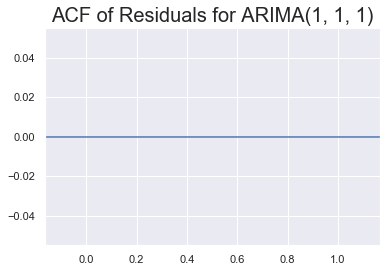

In [8]:
df['res_arima_111'] = results_arima_111.resid
sgt.plot_acf(df.res_arima_111, zero = False, lags = 40)
plt.title('ACF of Residuals for ARIMA(1, 1, 1)', size = 20)
plt.show()
# The ACF failed to compute due to the missing value at the first element

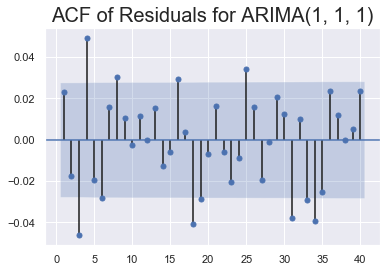

In [9]:
# Trying again without the first element
df['res_arima_111'] = results_arima_111.resid
sgt.plot_acf(df.res_arima_111[1:], zero = False, lags = 40)
plt.title('ACF of Residuals for ARIMA(1, 1, 1)', size = 20)
plt.show()

## Higher-Lag ARIMA Models

In [10]:
model_arima_112 = ARIMA(df.market_value, order = (1, 1, 2))
results_arima_112 = model_arima_112.fit()

In [11]:
model_arima_113 = ARIMA(df.market_value, order = (1, 1, 3))
results_arima_113 = model_arima_113.fit()

In [12]:
model_arima_211 = ARIMA(df.market_value, order = (2, 1, 1))
results_arima_211 = model_arima_211.fit()

In [13]:
model_arima_311 = ARIMA(df.market_value, order = (3, 1, 1))
results_arima_311 = model_arima_311.fit()

In [14]:
model_arima_312 = ARIMA(df.market_value, order = (3, 1, 2))
results_arima_312 = model_arima_312.fit(start_ar_lags = 5)

In [15]:
print('ARIMA(1, 1, 1):  \t LL = ', results_arima_111.llf, '\t AIC = ', results_arima_111.aic)
print('ARIMA(1, 1, 2):  \t LL = ', results_arima_112.llf, '\t AIC = ', results_arima_112.aic)
print('ARIMA(1, 1, 3):  \t LL = ', results_arima_113.llf, '\t AIC = ', results_arima_113.aic)
print('ARIMA(2, 1, 1):  \t LL = ', results_arima_211.llf, '\t AIC = ', results_arima_211.aic)
print('ARIMA(3, 1, 1):  \t LL = ', results_arima_311.llf, '\t AIC = ', results_arima_311.aic)
print('ARIMA(3, 1, 2):  \t LL = ', results_arima_312.llf, '\t AIC = ', results_arima_312.aic)

ARIMA(1, 1, 1):  	 LL =  -27603.666412781506 	 AIC =  55215.33282556301
ARIMA(1, 1, 2):  	 LL =  -27600.08186312436 	 AIC =  55210.16372624872
ARIMA(1, 1, 3):  	 LL =  -27590.4240325551 	 AIC =  55192.8480651102
ARIMA(2, 1, 1):  	 LL =  -27599.807487848047 	 AIC =  55209.614975696095
ARIMA(3, 1, 1):  	 LL =  -27592.0553717072 	 AIC =  55196.1107434144
ARIMA(3, 1, 2):  	 LL =  -27590.660808981047 	 AIC =  55195.321617962094


In [16]:
# Notice how ARIMA(1, 1, 3) yields the highest log-likelyhood and the lowest AIC
# Thus, it immediately becomes the front-runner of our shortlist

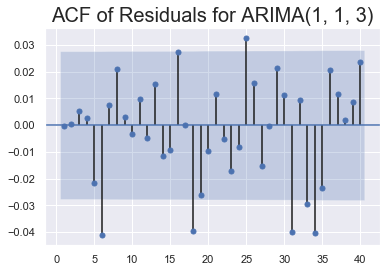

In [17]:
# Check if residuals resemble white noise
df['res_arima_113'] = results_arima_113.resid
sgt.plot_acf(df.res_arima_113[1:], zero = False, lags = 40)
plt.title('ACF of Residuals for ARIMA(1, 1, 3)', size = 20)
plt.show()

In [18]:
# Since the 6th lag is still relevant, checking if there is a better model
model_arima_511 = ARIMA(df.market_value, order = (5, 1, 1))
results_arima_511 = model_arima_511.fit()

In [19]:
model_arima_613 = ARIMA(df.market_value, order = (6, 1, 3))
results_arima_613 = model_arima_613.fit()

In [20]:
print('ARIMA(1, 1, 3):  \t LL = ', results_arima_113.llf, '\t AIC = ', results_arima_113.aic)
print('ARIMA(5, 1, 1):  \t LL = ', results_arima_511.llf, '\t AIC = ', results_arima_511.aic)
print('ARIMA(6, 1, 3):  \t LL = ', results_arima_613.llf, '\t AIC = ', results_arima_613.aic)

ARIMA(1, 1, 3):  	 LL =  -27590.4240325551 	 AIC =  55192.8480651102
ARIMA(5, 1, 1):  	 LL =  -27586.5118881075 	 AIC =  55189.023776215
ARIMA(6, 1, 3):  	 LL =  -27581.45547816363 	 AIC =  55184.91095632726


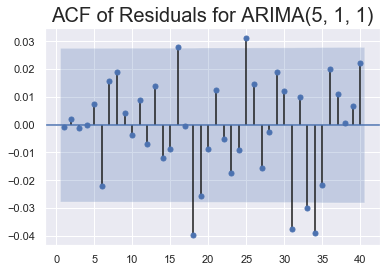

In [21]:
# Notice how ARIMA(5, 1, 1) yields the highest log-likelyhood and the lowest AIC, becoming
# our new preferred model
# Check if residuals resemble white noise
df['res_arima_511'] = results_arima_511.resid
sgt.plot_acf(df.res_arima_511[1:], zero = False, lags = 40)
plt.title('ACF of Residuals for ARIMA(5, 1, 1)', size = 20)
plt.show()

## Models with Higher Levels of Integration

We only rely on integration, when our time-series doesn't come from a stationary process.
If a single layer of integration (d = 1) accomplishes this, any additional ones are unnecessary.
How do we know if the integrated data set is stationary?

- Manually create an integrated version of the original time-series
- Use the Augmented Dickey-Fuller test

In [22]:
df['delta_prices'] = df.market_value.diff(1)

In [23]:
model_delta_arima_101 = ARIMA(df.delta_prices[1:], order = (1, 0, 1))
results_delta_arima_101 = model_delta_arima_101.fit()
results_delta_arima_101.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 15 Feb 2021   AIC                          55215.333
Time:                        19:34:59   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5654      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
sts.adfuller(df.delta_prices[1:])

(-32.244093495707475,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

## ARIMAX

A model that takes into account more than just past prices or past residuals

In [25]:
model_arimax_111_Xspx = ARIMA(df.market_value, order = (1, 1, 1), exog = df.spx)
results_arimax_111_Xspx = model_arimax_111_Xspx.fit()
results_arimax_111_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Mon, 15 Feb 2021   AIC                          55217.112
Time:                        19:49:04   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5901      2.655     -0.222      0.824      -5.793       4.613
spx                      0.0011      0.002      0.452      0.651      -0.004       0.006
ar.L1.D.market_value     0.7462      0.070     10.601      0.000       0.608       0.884
ma.L1.D.market_value    -0.7922      0.064    -12.304      0.000      -0.918      -0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3401           +0.0000j            1.3401            0.0000
MA.1            1.2622           +0.0000j            1.2622            0.0000
-----------------------------------------------------------------------------
"""